# Pré-processamento de Dados

<br>
<br>

Neste notebook, iremos tratar deste assunto extremamente importante no contexto de ciência de dados. Abordaremos 4 tópicos principais, a saber:

1- Dados faltantes;

2- Processamento de variáveis categóricas e One Hot Encoding;

3- Normalização;

4- Detecção de outliers.

Além de facilitar algumas análises exploratórias, esses preprocessamentos são muito importantes para uma variedade de algoritmos de aprendizado de máquina, como veremo adiante. Desta forma, __muita atenção a este tópico!__

<br><br>

## 1- Dados faltantes
### (também conhecido como "missing values", em inglês)

<br>

Vamos trabalhar num exemplo prático a fim de explicar este tema e quais procedimentos podemos tomar ao nos depararmos com dados faltantes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_modulo_7_1.csv")
df

,Idade,Sexo,Cidade,Gasto,Custo
0,45.0,masculino,Porto Alegre,66.0,94.0
1,43.0,feminino,Fortaleza,78.0,69.0
2,28.0,feminino,São Paulo,NaN,99.0
3,NaN,masculino,Fortaleza,54.0,NaN
4,NaN,feminino,Fortaleza,80.0,NaN
5,14.0,feminino,Porto Alegre,30.0,NaN
6,51.0,masculino,Fortaleza,74.0,NaN
7,60.0,masculino,Fortaleza,85.0,NaN
8,16.0,masculino,Porto Alegre,97.0,NaN
9,62.0,feminino,Fortaleza,42.0,NaN


Vemos que algumas variáveis possuem valores faltantes. Por exemplo, não temos a campo sexo preenchido na linha 15.

In [3]:
#quantidade de valores faltantes por variável

df.isnull().sum()

Idade      3
Sexo       1
Cidade     0
Gasto      6
Custo     27
dtype: int64

In [4]:
#em percentual

((df.isnull().sum() / df.shape[0]) * 100).round(2)

Idade     10.00
Sexo       3.33
Cidade     0.00
Gasto     20.00
Custo     90.00
dtype: float64

Como podemos tratar esses valores?

Algumas alternativas mais diretas seriam retirar as colunas que possuam algum valor faltante. Outra alternativa seria retirar as linhas que possuam algum valor faltante:

In [5]:
df.dropna(axis = 1)

,Cidade
0,Porto Alegre
1,Fortaleza
2,São Paulo
3,Fortaleza
4,Fortaleza
5,Porto Alegre
6,Fortaleza
7,Fortaleza
8,Porto Alegre
9,Fortaleza


In [6]:
df.dropna(axis = 0)

,Idade,Sexo,Cidade,Gasto,Custo
0,45.0,masculino,Porto Alegre,66.0,94.0
1,43.0,feminino,Fortaleza,78.0,69.0


Essa abordagem, apesar de muito simples e imediata de usar, pode ser "agressiva", visto que acabamos desconsiderando muita informação dos dados ao retirar todos os dados faltantes.

Podemos tomar outras abordagens, que serão discutidas adiante. Para isso, vamos dividir essas abordagens em dois grandes grupos: quando a variável em questão que possui valores faltantes é numérica e quando é categórica.

<br>

### Variáveis numéricas

Vamos começar considerando o tratamento de __variáveis numéricas.__ No dataset de exemplo, seriam as variáveis Idade, Gasto e Custo.

A variável Idade está faltante em 3 linhas, correspondendo a 10% do dataset inteiro. Uma abordagem para tratar esses valores faltantes é preenchê-los. Podemos fazer isso de várias formas: preencher com a média da variável, com a mediana, etc. Outras abordagens seriam preencher com outros valores quaisquer ou simplesmente excluir as linhas que contenham os dados faltantes.

In [7]:
media_idade = df.Idade.mean()
media_idade

39.111111111111114

In [8]:
#localizando as linhas, na coluna Idade, que possuem valores faltantes

df.Idade.loc[np.isnan(df.Idade)]

3    NaN
4    NaN
12   NaN
Name: Idade, dtype: float64

In [9]:
#preenchendo esses valores com a média

df.Idade.fillna(media_idade)

0     45.000000
1     43.000000
2     28.000000
3     39.111111
4     39.111111
5     14.000000
6     51.000000
7     60.000000
8     16.000000
9     62.000000
10    49.000000
11    38.000000
12    39.111111
13    10.000000
14    21.000000
15    40.000000
16    60.000000
17    49.000000
18    39.000000
19    30.000000
20    10.000000
21    45.000000
22    57.000000
23    26.000000
24    50.000000
25    58.000000
26    66.000000
27    41.000000
28    35.000000
29    13.000000
Name: Idade, dtype: float64

In [10]:
df.Idade.fillna(-1)

0     45.0
1     43.0
2     28.0
3     -1.0
4     -1.0
5     14.0
6     51.0
7     60.0
8     16.0
9     62.0
10    49.0
11    38.0
12    -1.0
13    10.0
14    21.0
15    40.0
16    60.0
17    49.0
18    39.0
19    30.0
20    10.0
21    45.0
22    57.0
23    26.0
24    50.0
25    58.0
26    66.0
27    41.0
28    35.0
29    13.0
Name: Idade, dtype: float64

As variáveis Gasto e Custo podem ser tratadas de formas similares.

__Ponto de atenção:__ A variável custo está com 90% de valores faltantes, de modo que quase toda informação dessa variável foi perdida. Nestes casos, preencher com a média pode não ser uma boa idéia. Além disso, simplesmente dropar todas as linhas faltantes iria "cortar" quase todo o dataset... então, o que fazer? de fato, não existe resposta certa; vai depender do problema em questão! Uma solução poderia ser simplesmente não usar a variável.

<br>

### Variáveis categóricas

Já no caso de __variáveis categóricas__, não faz sentido preencher com a média ou mediana. Uma prática comum é preencher com a __moda__, ou seja, o valor mais frequente da classe.

Vejamos no exemplo, a variável Sexo:

In [11]:
df.Sexo.value_counts()

masculino    18
feminino     11
Name: Sexo, dtype: int64

In [12]:
#calculando a moda da variável sexo

moda_variavel_sexo = df.Sexo.value_counts().idxmax()
moda_variavel_sexo

'masculino'

In [13]:
#linha 15 era a linha com valor faltante, agora preenchido com a moda da variável

df.Sexo.fillna(moda_variavel_sexo)

0     masculino
1      feminino
2      feminino
3     masculino
4      feminino
5      feminino
6     masculino
7     masculino
8     masculino
9      feminino
10     feminino
11    masculino
12    masculino
13    masculino
14    masculino
15    masculino
16    masculino
17     feminino
18    masculino
19    masculino
20    masculino
21    masculino
22     feminino
23     feminino
24    masculino
25    masculino
26     feminino
27    masculino
28     feminino
29    masculino
Name: Sexo, dtype: object

<br><br>

Vamos abaixo montar uma função que trata variáveis com a seguinte lógica:

- Se a variável tiver mais do que 80% dos dados faltantes, iremos deletar a coluna;
- Se a variável for numérica, iremos preencher com a média;
- Se a variável for categórica, iremos preencher com a moda.

In [14]:
def preprocessamento(df, cols_numericas, cols_categoricas):
    dff = df.copy()
    temp = (df.isnull().sum() / df.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes:
        dff = dff.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
        
    for v in cols_numericas:
        dff[v] = dff[v].fillna(dff[v].mean())
        
    for v in cols_categoricas:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
    return dff

In [15]:
df

,Idade,Sexo,Cidade,Gasto,Custo
0,45.0,masculino,Porto Alegre,66.0,94.0
1,43.0,feminino,Fortaleza,78.0,69.0
2,28.0,feminino,São Paulo,NaN,99.0
3,NaN,masculino,Fortaleza,54.0,NaN
4,NaN,feminino,Fortaleza,80.0,NaN
5,14.0,feminino,Porto Alegre,30.0,NaN
6,51.0,masculino,Fortaleza,74.0,NaN
7,60.0,masculino,Fortaleza,85.0,NaN
8,16.0,masculino,Porto Alegre,97.0,NaN
9,62.0,feminino,Fortaleza,42.0,NaN


In [16]:
df_limpo = preprocessamento(df = df, 
                            cols_numericas = ['Idade', 'Gasto', 'Custo'], 
                            cols_categoricas = ['Sexo', 'Cidade'])

df_limpo

,Idade,Sexo,Cidade,Gasto
0,45.000000,masculino,Porto Alegre,66.000000
1,43.000000,feminino,Fortaleza,78.000000
2,28.000000,feminino,São Paulo,60.416667
3,39.111111,masculino,Fortaleza,54.000000
4,39.111111,feminino,Fortaleza,80.000000
5,14.000000,feminino,Porto Alegre,30.000000
6,51.000000,masculino,Fortaleza,74.000000
7,60.000000,masculino,Fortaleza,85.000000
8,16.000000,masculino,Porto Alegre,97.000000
9,62.000000,feminino,Fortaleza,42.000000


<br><br>

## 2- Processamento de variáveis categóricas e One Hot Encoding

<br>

 
Existem duas manipulações muito comuns com variáveis categóricas:

    1 - Transformar os valores "string" para valores numéricos;
    2 - Técnica OHE - Ohe Hot Encoding. (A ser explicada na sequência)

<br>

Trabalhando com o dataset "df_limpo", podemos facilmente aplicar a transformação 1 nas variáveis Sexo e Cidade.

Por exemplo, para variável sexo, definimos:

- Masculino = 0;
- Feminino = 1;
    
E para variável cidade:

- Porto Alegre = 0;
- Fortaleza = 1;
- São Paulo = 2;
    

In [17]:
dic_variavelSexo = {"masculino":0, "feminino":1}
dic_variavelCidade = {"Porto Alegre":0, "Fortaleza":1, "São Paulo":2}

df_limpo['Sexo_numerico'] = df_limpo.Sexo.map(dic_variavelSexo)
df_limpo['Cidade_numerico'] = df_limpo.Cidade.map(dic_variavelCidade)

df_limpo

,Idade,Sexo,Cidade,Gasto,Sexo_numerico,Cidade_numerico
0,45.000000,masculino,Porto Alegre,66.000000,0,0
1,43.000000,feminino,Fortaleza,78.000000,1,1
2,28.000000,feminino,São Paulo,60.416667,1,2
3,39.111111,masculino,Fortaleza,54.000000,0,1
4,39.111111,feminino,Fortaleza,80.000000,1,1
5,14.000000,feminino,Porto Alegre,30.000000,1,0
6,51.000000,masculino,Fortaleza,74.000000,0,1
7,60.000000,masculino,Fortaleza,85.000000,0,1
8,16.000000,masculino,Porto Alegre,97.000000,0,0
9,62.000000,feminino,Fortaleza,42.000000,1,1


Bacana! Foi muito simples fazer essas transformações. 

Analisando a variável Sexo_numérico, vemos que o valor 1 refere-se ao sexo feminino - e portanto 0 ao masculino - desta forma, podemos interpretar essa variável como sendo uma variável booleana representando o sexo feminino.

Já no caso da variável Cidade_numerico, não temos uma caracterização similar. Mas podemos trabalhar nisso e criar variáveis booleanas que representam __cada__ cidade! Essa é a essência da técnica __one hot encoding!__

Vejamos abaixo como aplicá-la. De fato, usaremos a biblioteca __scikit-learn__ para isso - essa biblioteca será muito usada nos módulos de aprendizado de máquina.

Na prática, iremos:

1- Instanciar o objeto one-hot-encoder;

2- fitar este objeto a nossa variável - aqui é onde acontece a transformação da variável.

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder()

In [20]:
variavel_ohe = df_limpo.Cidade.values.reshape(-1,1)

ohe.fit(variavel_ohe)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [21]:
ohe.transform(variavel_ohe)

<30x3 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [22]:
ohe.transform(variavel_ohe).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
ohe.categories_

[array(['Fortaleza', 'Porto Alegre', 'São Paulo'], dtype=object)]

In [24]:
dataframe_OHE = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())
dataframe_OHE

,Fortaleza,Porto Alegre,São Paulo
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [25]:
#agrupando no dataset - para comparar os resultados

pd.concat([df_limpo, dataframe_OHE], axis = 1)

,Idade,Sexo,Cidade,Gasto,Sexo_numerico,Cidade_numerico,Fortaleza,Porto Alegre,São Paulo
0,45.000000,masculino,Porto Alegre,66.000000,0,0,0.0,1.0,0.0
1,43.000000,feminino,Fortaleza,78.000000,1,1,1.0,0.0,0.0
2,28.000000,feminino,São Paulo,60.416667,1,2,0.0,0.0,1.0
3,39.111111,masculino,Fortaleza,54.000000,0,1,1.0,0.0,0.0
4,39.111111,feminino,Fortaleza,80.000000,1,1,1.0,0.0,0.0
5,14.000000,feminino,Porto Alegre,30.000000,1,0,0.0,1.0,0.0
6,51.000000,masculino,Fortaleza,74.000000,0,1,1.0,0.0,0.0
7,60.000000,masculino,Fortaleza,85.000000,0,1,1.0,0.0,0.0
8,16.000000,masculino,Porto Alegre,97.000000,0,0,0.0,1.0,0.0
9,62.000000,feminino,Fortaleza,42.000000,1,1,1.0,0.0,0.0


__Ponto de atenção:__ as informações contidas neste dataset final são repetitivas. Por exemplo, as variáveis "Sexo" e "Sexo_numerico" representam a mesma informação, bem como as variáveis "Cidade", "Cidade_numérico" e as três variáveis OHE das cidades.

<br><br>

## 3- Normalização dos dados

<br>

Neste tema, objetivo é padronizar os dados, mudando a escala dos mesmos.

Por exemplo, considere a variável Idade do dataset "df_limpo" acima: 

Informações ~ Idade:

count    30.000000
mean     39.111111
std      16.195643
min      10.000000
25%      28.500000
50%      39.555556
75%      49.750000
max      66.000000
Name: Idade, dtype: float64


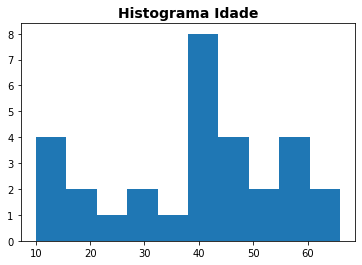

In [26]:
print("Informações ~ Idade:\n")
print(df_limpo.Idade.describe())

plt.title("Histograma Idade", fontsize = 14, fontweight = 'bold')
plt.hist(df_limpo.Idade)
plt.show()

A variável idade tem uma média perto de 40 e um desvio padrão considerável. Uma normalização muito comum é a __MinMaxScaler__, na qual o objetivo é transformar a variável de modo que o valor máximo da mesma seja 1 e o mínimo seja 0. 

Na prática, basta aplicar a seguinte transformação:

    - Considere a variável X;
    - Defina M = valor máximo de X;
    - Defina m = valor mínimo de X;
    
    - Transformação: X_transf = (X - m) / (M-m)

In [27]:
X = df_limpo.Idade.values
M = np.max(X)
m = np.min(X)

X_minmax = (X - m) / (M-m)

Informações ~ Idade (MinMax):

count    30.000000
mean      0.519841
std       0.289208
min       0.000000
25%       0.330357
50%       0.527778
75%       0.709821
max       1.000000
dtype: float64


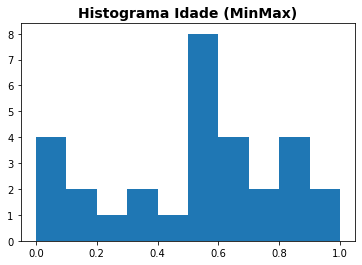

In [28]:
print("Informações ~ Idade (MinMax):\n")
print(pd.Series(X_minmax).describe())

plt.title("Histograma Idade (MinMax)", fontsize = 14, fontweight = 'bold')
plt.hist(X_minmax)
plt.show()

Outra transformação muito comum é a __normalização padrão__: nesta transformação, o objetivo é que a nova variável tenha média 0 e desvio padrão 1.

Na prática: basta diminuir da variável sua média e dividir pelo desvio padrão.

    - Considere a variável X;
    - Defina Md = média de X;
    - Defina S = desvio padrão de X;
    
    - Transformação: X_normPadrao = (X - Md) / S

In [29]:
X = df_limpo.Idade.values
Md = np.mean(X)
S = np.std(X)

X_normPadrao = (X - Md) / S

Informações ~ Idade (NormPadrao):

count    30.00000
mean      0.00000
std       1.01710
min      -1.82819
25%      -0.66638
50%       0.02791
75%       0.66813
max       1.68864
dtype: float64


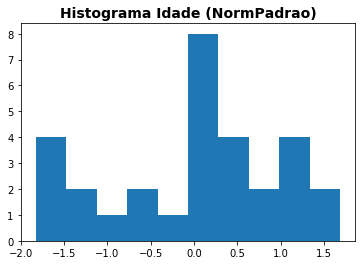

In [30]:
print("Informações ~ Idade (NormPadrao):\n")
print(pd.Series(X_normPadrao).describe().round(5))

plt.title("Histograma Idade (NormPadrao)", fontsize = 14, fontweight = 'bold')
plt.hist(X_normPadrao)
plt.show()

Na prática, não precisaremos calcular manualmente esses valores; iremos, novamente, usar a biblioteca __scikit-learn__ e aplicar essas transformações diretamente:

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [33]:
X = df_limpo.Idade.values.reshape(-1,1)
X

array([[45.        ],
       [43.        ],
       [28.        ],
       [39.11111111],
       [39.11111111],
       [14.        ],
       [51.        ],
       [60.        ],
       [16.        ],
       [62.        ],
       [49.        ],
       [38.        ],
       [39.11111111],
       [10.        ],
       [21.        ],
       [40.        ],
       [60.        ],
       [49.        ],
       [39.        ],
       [30.        ],
       [10.        ],
       [45.        ],
       [57.        ],
       [26.        ],
       [50.        ],
       [58.        ],
       [66.        ],
       [41.        ],
       [35.        ],
       [13.        ]])

Aqui, precisamos fitar o transformador na variável de interesse para que o mesmo possa salvar as informações necessárias para executar a transformação - no caso do MinMax, precisa salvar os valores de mínimo e máximo da variável, enquanto que o NormPadrao precisa salvar a média e o desvio padrão -.

In [34]:
mm_scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
ss_scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Agora, basta __transformar__ a variável:

In [36]:
mm_scaler.transform(X)

array([[0.625     ],
       [0.58928571],
       [0.32142857],
       [0.51984127],
       [0.51984127],
       [0.07142857],
       [0.73214286],
       [0.89285714],
       [0.10714286],
       [0.92857143],
       [0.69642857],
       [0.5       ],
       [0.51984127],
       [0.        ],
       [0.19642857],
       [0.53571429],
       [0.89285714],
       [0.69642857],
       [0.51785714],
       [0.35714286],
       [0.        ],
       [0.625     ],
       [0.83928571],
       [0.28571429],
       [0.71428571],
       [0.85714286],
       [1.        ],
       [0.55357143],
       [0.44642857],
       [0.05357143]])

In [37]:
ss_scaler.transform(X)

array([[ 3.69825450e-01],
       [ 2.44224354e-01],
       [-6.97783869e-01],
       [ 4.46224733e-16],
       [ 4.46224733e-16],
       [-1.57699154e+00],
       [ 7.46628739e-01],
       [ 1.31183367e+00],
       [-1.45139045e+00],
       [ 1.43743477e+00],
       [ 6.21027643e-01],
       [-6.97783869e-02],
       [ 4.46224733e-16],
       [-1.82819374e+00],
       [-1.13738771e+00],
       [ 5.58227095e-02],
       [ 1.31183367e+00],
       [ 6.21027643e-01],
       [-6.97783869e-03],
       [-5.72182772e-01],
       [-1.82819374e+00],
       [ 3.69825450e-01],
       [ 1.12343203e+00],
       [-8.23384965e-01],
       [ 6.83828191e-01],
       [ 1.18623258e+00],
       [ 1.68863696e+00],
       [ 1.18623258e-01],
       [-2.58180031e-01],
       [-1.63979209e+00]])

Vamos comparar os resultados com as transformações feitas manualmente:

In [38]:
pd.DataFrame(np.c_[X_minmax, mm_scaler.transform(X), X_normPadrao, ss_scaler.transform(X)]).round(4)

,0,1,2,3
0,0.6250,0.6250,0.3698,0.3698
1,0.5893,0.5893,0.2442,0.2442
2,0.3214,0.3214,-0.6978,-0.6978
3,0.5198,0.5198,0.0000,0.0000
4,0.5198,0.5198,0.0000,0.0000
5,0.0714,0.0714,-1.5770,-1.5770
6,0.7321,0.7321,0.7466,0.7466
7,0.8929,0.8929,1.3118,1.3118
8,0.1071,0.1071,-1.4514,-1.4514
9,0.9286,0.9286,1.4374,1.4374


<br><br>

## 4- Detecção de Outliers

<br>

Por definição, um __outlier__ é um valor fora do padrão apresentado; um valor __discrepante__. Na prática, é muito interessante a identificação de outliers, visto que eles podem nos gerar insights interessantes nos dados. Neste notebook, iremos ter uma tratativa mais simples deste tema; iremos abordá-lo mais profundamente em módulos futuros, quando discutirmos detecção de anomalias. 

A fim de estudar a detecção de outliers, considere o dataset abaixo. 

In [39]:
df2 = pd.read_csv("df_modulo_7_2.csv").round(2)
df2

,area_m2,preco
0,59.08,651196.96
1,54.27,505271.28
2,126.21,1387764.89
3,70.90,677416.51
4,50.98,530286.05
...,...,...
1145,143.84,1726273.75
1146,168.86,1695094.11
1147,227.67,2467124.11
1148,134.21,1305743.50


Podemos usar os gráficos __boxplot__ para identificação de outliers de forma visual:

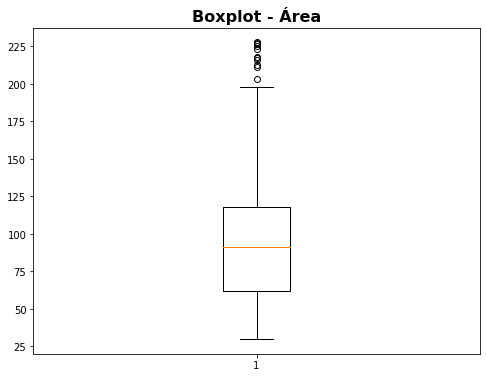

In [40]:
plt.figure(figsize=[8,6])
plt.title("Boxplot - Área", fontsize = 16, fontweight = 'bold')
plt.boxplot(df2.area_m2)
plt.show()

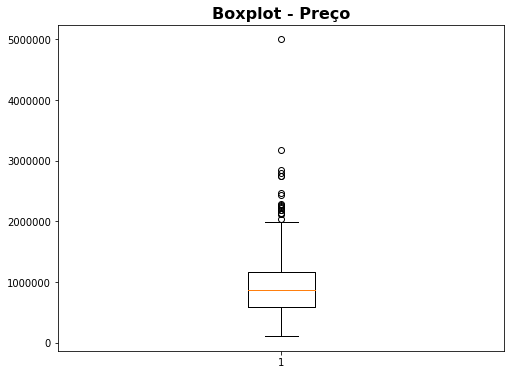

In [41]:
plt.figure(figsize=[8,6])
plt.title("Boxplot - Preço", fontsize = 16, fontweight = 'bold')
plt.boxplot(df2.preco)
plt.show()

A partir dos boxplots acima, vemos que as duas variáveis do dataset possuem valores discrepantes, acima do limite superior do boxplot. 

Como podemos calcular os limites inferiores e superiores do boxplot? Vamos fazer isso, como exemplo, para a variável área do dataset.

In [42]:
#primeiramente, calculamos o intervalo interquartil

iqr = np.percentile(df2.area_m2, 75) - np.percentile(df2.area_m2, 25)
iqr

56.485000000000014

In [43]:
limite_inf = np.maximum(np.percentile(df2.area_m2, 25) - 1.5 * iqr, np.min(df2.area_m2))
limite_inf

30.0

In [44]:
limite_sup = np.minimum(np.percentile(df2.area_m2, 75) + 1.5 * iqr, np.max(df2.area_m2))
limite_sup

202.87500000000003

Tendo calculado os limites, podemos usar uma definição de outlier sendo os valores que estão acima do limite superior ou abaixo do limite inferior.

__Ponto de atenção: a noção de outlier é altamente dependente do problema em questão, de modo que não existe uma definição universal de outlier. Desta forma, é fundamental um alinhamento do cientista de dados com o problema que está tentando resolver!__

Vamos, abaixo, escrever uma função que captura esses valores discrepantes, a partir das informações acima:

In [45]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [46]:
df2['outlier_area'] = detecta_outlier(df2.area_m2)
df2['outlier_preco'] = detecta_outlier(df2.preco)

In [47]:
df2

,area_m2,preco,outlier_area,outlier_preco
0,59.08,651196.96,0,0
1,54.27,505271.28,0,0
2,126.21,1387764.89,0,0
3,70.90,677416.51,0,0
4,50.98,530286.05,0,0
...,...,...,...,...
1145,143.84,1726273.75,0,0
1146,168.86,1695094.11,0,0
1147,227.67,2467124.11,1,1
1148,134.21,1305743.50,0,0


In [48]:
#filtrando os outliers - definidos pela função acima

df2.loc[(df2.outlier_area == 1) | (df2.outlier_preco == 1)].round(2)

,area_m2,preco,outlier_area,outlier_preco
100,77.99,5000000.00,0,1
241,60.28,3184228.49,0,1
1074,134.84,2039322.41,0,1
1100,226.38,2792302.43,1,1
1101,211.29,2187476.56,1,1
1103,197.76,2854822.72,0,1
1106,181.47,2243617.65,0,1
1120,223.43,2122724.86,1,1
1121,177.12,2439631.97,0,1
1123,191.86,2287608.92,0,1


Vamos plotar a dispersão das variáveis área e preço a fim de analisar um pouco mais nosso conjunto de dados:

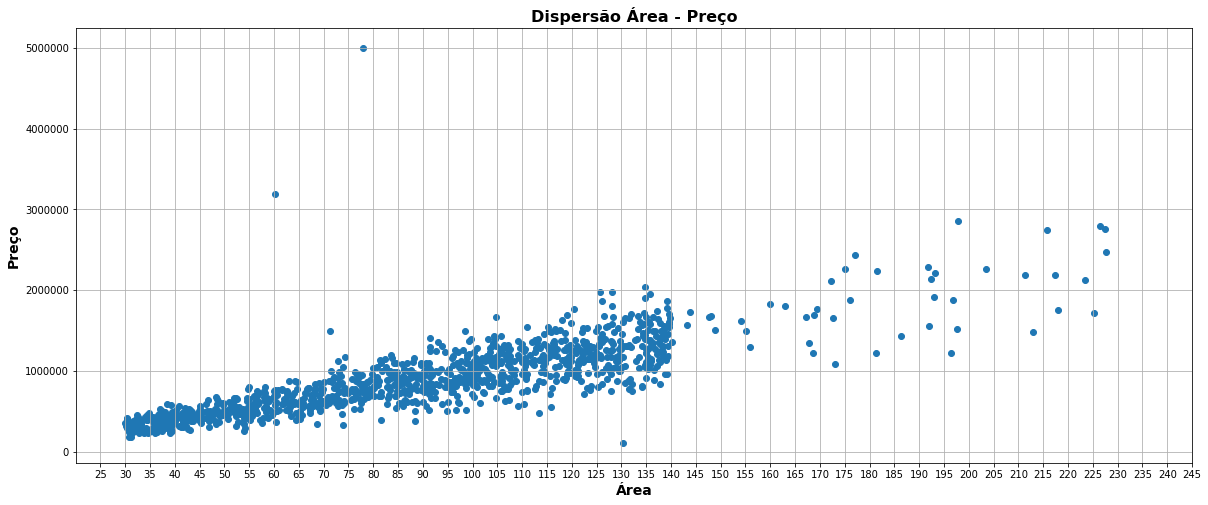

In [49]:
plt.figure(figsize=[20,8])
plt.title("Dispersão Área - Preço", fontsize = 16, fontweight = 'bold')
plt.xlabel("Área", fontsize = 14, fontweight = 'bold')
plt.ylabel("Preço", fontsize = 14, fontweight = 'bold')
plt.scatter(df2.area_m2, df2.preco)
plt.xticks(list(range(25, 250,5)))
plt.grid()
plt.show()

Vemos que __nem todo outlier é unidimensional!__ Por exemplo, o ponto cuja área é 130 e tem um preço baixo não é registrado como outlier de acordo com a nossa função acima.

Desta forma, __Como podemos capturar esses outliers de uma forma automatizada?__

Para responder a esta pergunta, é muito importante a __criatividade do cientista de dados__ e a capacidade de inventar soluções que resolvam o problema em questão!

Neste espírito, vamos tentar inventar um mecanismo que capture esses outliers "bidimensionais".

Considere o filtro no dataset onde a área está entre 130 e 135; em seguida, vejamos o boxplot da variável preço neste subconjunto:

{'whiskers': [<matplotlib.lines.Line2D at 0x12a507710>,
 'caps': [<matplotlib.lines.Line2D at 0x12a50c1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a4fca90>],
 'medians': [<matplotlib.lines.Line2D at 0x12a50cc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a515150>],
 'means': []}

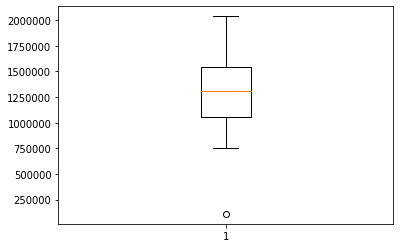

In [50]:
temp = df2.loc[(df2.area_m2 > 130) & (df2.area_m2 < 135)].preco
plt.boxplot(temp)

Veja que achamos o outlier!! Até então, antes de considerarmos o filtro, não havíamos detectado este ponto como um outlier.

Motivados com essa ideia do filtro, vamos atacar o problema da seguinte forma:

Iremos aplicar nossa função que detecta outliers em subconjuntos do nosso dataset original, assim como fizemos logo acima. Iremos varrer todo o range de áreas, de modo a considerar todo o dataset.

In [51]:
import warnings
warnings.filterwarnings("ignore")

Abaixo, declaramos uma lista - L - vazia. Dentro do loop, fazemos o filtro de áreas e aplicamos nossa função de captura de outliers apenas no subconjunto de dados. Finalmente, adicionamos o dataset, já com a marcação dos outliers, na lista.

Na sequência, agrupamos todos os dataset da lista em um dataset único. Veja:

In [52]:
L = []
for i in range(25, 250, 5):
    lim_1 = i
    lim_2 = i + 5
    
    temp = df2.loc[(df2.area_m2 > lim_1) & (df2.area_m2 < lim_2)]
    
    if temp.shape[0]>0:
        
        outliers = detecta_outlier(temp.preco)
        if len(outliers) > 0:
            temp['out_bidimensional'] = detecta_outlier(temp.preco)
        else:
            temp['out_bidimensional'] = 0
            
        L.append(temp)

In [53]:
from functools import reduce

df2_final = reduce(lambda a, b: pd.concat([a, b]), L)
df2_final

,area_m2,preco,outlier_area,outlier_preco,out_bidimensional
35,32.10,411016.15,0,0,0
46,31.07,331649.50,0,0,0
55,34.53,230885.90,0,0,0
71,30.81,250432.16,0,0,0
109,32.51,437077.47,0,0,0
...,...,...,...,...,...
1120,223.43,2122724.86,1,1,0
1100,226.38,2792302.43,1,1,0
1127,225.26,1717487.74,1,0,0
1128,227.39,2752798.41,1,1,0


Filtrando os pontos que foram detectados como outliers apenas no contexto bidimensional:

In [54]:
df2_final.loc[ (df2_final.outlier_area == 0) & 
               (df2_final.outlier_preco == 0) & 
               (df2_final.out_bidimensional == 1) ]

,area_m2,preco,outlier_area,outlier_preco,out_bidimensional
586,54.95,802920.02,0,0,1
689,54.82,778838.96,0,0,1
766,53.99,256437.69,0,0,1
20,71.30,1500000.00,0,0,1
986,81.66,393431.87,0,0,1
509,88.39,385474.30,0,0,1
14,91.43,1409442.80,0,0,1
273,98.57,1497368.30,0,0,1
318,104.81,1662527.71,0,0,1
287,113.49,475153.33,0,0,1


Finalmente, vamos plotar os resultados para comparação:

In [55]:
DF_outliers_bidim = df2_final.loc[df2_final.out_bidimensional ==1]

DF_outliers_area = df2_final.loc[df2_final.outlier_area == 1]

DF_outliers_preco = df2_final.loc[df2_final.outlier_preco == 1]

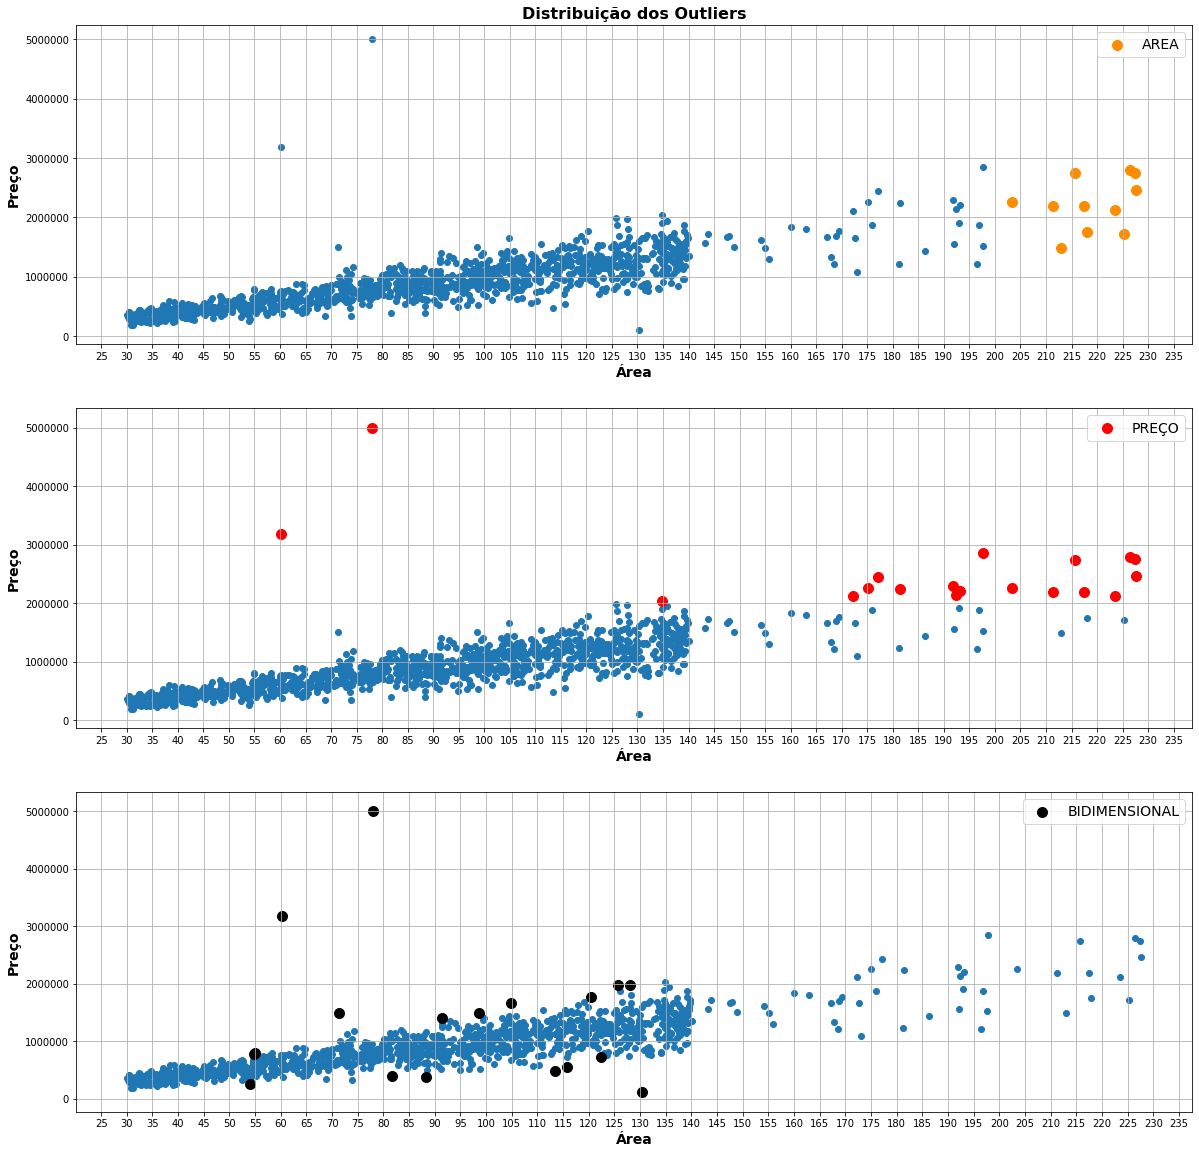

In [56]:
plt.figure(figsize=[20,20])
plt.subplot(3,1,1)
plt.title("Distribuição dos Outliers", fontsize = 16, fontweight = 'bold')
plt.xlabel("Área", fontsize = 14, fontweight = 'bold')
plt.ylabel("Preço", fontsize = 14, fontweight = 'bold')
plt.scatter(df2.area_m2, df2.preco)
plt.xticks(list(range(25, 250,5)))
plt.scatter(DF_outliers_area.area_m2, DF_outliers_area.preco, c = 'darkorange', label = 'AREA', s = 100)
plt.legend(fontsize = 14)
plt.grid()

plt.subplot(3,1,2)
plt.xlabel("Área", fontsize = 14, fontweight = 'bold')
plt.ylabel("Preço", fontsize = 14, fontweight = 'bold')
plt.scatter(df2.area_m2, df2.preco)
plt.xticks(list(range(25, 250,5)))
plt.scatter(DF_outliers_preco.area_m2, DF_outliers_preco.preco, c = 'red', label = 'PREÇO', s = 100)
plt.legend(fontsize = 14)
plt.grid()

plt.subplot(3,1,3)
plt.xlabel("Área", fontsize = 14, fontweight = 'bold')
plt.ylabel("Preço", fontsize = 14, fontweight = 'bold')
plt.scatter(df2.area_m2, df2.preco)
plt.xticks(list(range(25, 250,5)))
plt.scatter(DF_outliers_bidim.area_m2, DF_outliers_bidim.preco, c = 'black', label = 'BIDIMENSIONAL', s = 100)
plt.legend(fontsize = 14)
plt.grid()

plt.show()